In [2]:
import os,sys,time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression

   col_name       lse
0        41  0.085616
1        40  0.089005
2        10  0.074655
3        47  0.079909


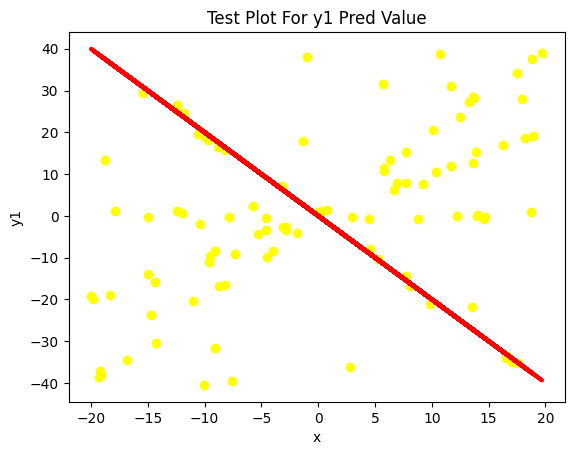

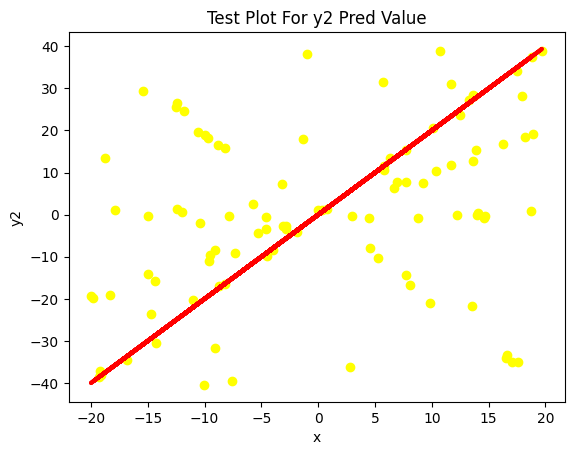

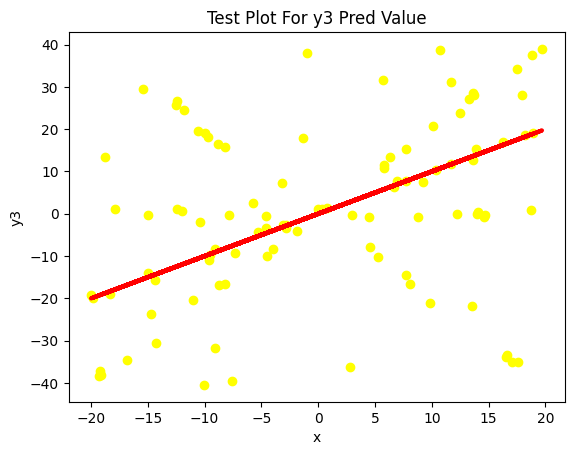

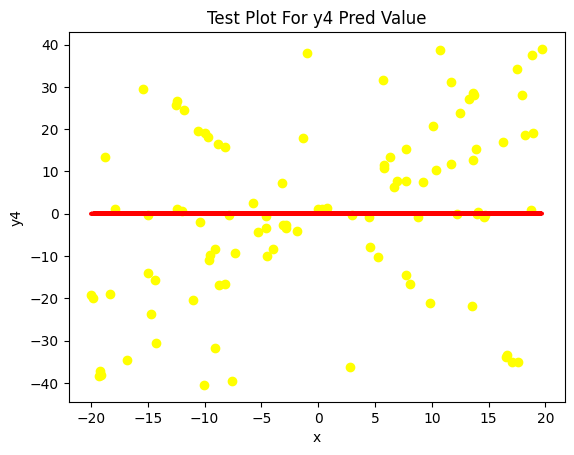

In [3]:
class loading_database_tosql():
    # lets featch the files present in the current dir usinf list comperhension
    files = [ i for i in os.listdir(os.getcwd()) if i.endswith("csv")]
    def __init__(self, file_name):
        # asking user input as file name for create a sql db (data base)
        self.file_name = file_name
    def complie_sql_database(self):
        #create a sqlite database using dynamic name give by the user 
        self.engine = create_engine(f"sqlite:///{self.file_name}.db")
    def train_dataset_tosql (self):
        if "train.csv" in loading_database_tosql.files:
            self.train_df = pd.read_csv(loading_database_tosql.files[2])
            self.train_df.to_sql("train_data",con=self.engine,if_exists="replace",index = False)
        else:
            print(f"file is not present in the dicretory: {os.getcwd()}")
    def ideal_dataset_tosql(self):
        if "ideal.csv" in loading_database_tosql.files:
            self.ideal_df = pd.read_csv(loading_database_tosql.files[0])
            self.ideal_df.to_sql("ideal_data",con=self.engine,if_exists="replace",index = False)
        else:
            print(f"file is not present in the dicretory: {os.getcwd()}")
    def test_dataset_tosql(self):
        if "test.csv" in loading_database_tosql.files:
            self.test_df = pd.read_csv(loading_database_tosql.files[1])
            self.test_df.to_sql("test_data",con=self.engine,if_exists="replace",index = False)
        else:
            print(f"file is not present in the dicretory: {os.getcwd()}")


class test(loading_database_tosql):
    def __init__(self,file_name):
        super().__init__(file_name)
        
    def sceraching4idealfunc(self):
        self.ideal_dataset_tosql()
        self.train_dataset_tosql()
        self.least_square = []
        self.index_positon = []
        for i in range(1,len(self.train_df.columns)):
            lse_square = []
            for j in range(1,len(self.ideal_df.columns)):
                mse_value = 0
                for k in range (len(self.train_df)):
                    x = self.train_df.iloc[k,i]
                    y = self.ideal_df.iloc[k,j]
                    mse_value = mse_value + ((x-y)**2)
                lse_square.append(mse_value/len(self.train_df))
            minimum = min(lse_square)
            if minimum < np.sqrt(2):
                index = lse_square.index(minimum)
                self.index_positon.append(index)
                self.least_square.append(minimum)
        self.table = pd.DataFrame({
            "col_name" : self.index_positon,
            "lse":self.least_square
        }
                            )
        print(self.table)
    def reading_test_data(self):
        self.test_dataset_tosql()
        self.test_df.sort_values("x").reset_index()
        ideals = []
        for i in range(0,4):
            ideals.append(self.ideal_df[["x",f"y{str(self.table.iloc[i,0])}"]])
        # merging to test data set
        for i in ideals:
            self.test_df = self.test_df.merge(i,on="x",how = "left")
    def deviation (self):
        mse_lisr = []
        dev = []
        ideal_index = []
        for j in range(len(self.test_df)): # loop for rows
            for i in range(2,len(self.test_df.columns)): # loop for columns
                v1 = self.test_df.iloc[j,1]
                v2 = self.test_df.iloc[j,i]
                mse = ((v1-v2)**2)
                mse_lisr.append(mse)
            min_least = min(mse_lisr)
            if min_least < np.sqrt(2)*1180:
                dev.append(min_least)
                index = mse_lisr.index(min_least)
                ideal_index.append(index)
            else:
                deviation.append(min_least)
                ideal_index.append("null")
        self.test_df["Dev"] = dev
        self.test_df["ideal_index"] = ideal_index
    def visilazation(self):
        train_columns = self.train_df.columns[1:]
        mod = LinearRegression()
        # print(train_columns)
        for i in train_columns:
            mod.fit(self.train_df["x"].values.reshape(-1,1),self.train_df[i].values.reshape(-1,1))
            yp = mod.predict(self.test_df['x'].values.reshape(-1, 1))
            df2 = pd.DataFrame(yp,columns=[f"Pred_{str(i)}"])         
            self.test_df = pd.concat([self.test_df, df2], axis=1)
        # print(self.test_df)
        # # Plot the regression line
            plt.scatter(self.test_df['x'], self.test_df['y'], color='yellow')
            plt.plot(self.test_df['x'], self.test_df[f"Pred_{str(i)}"], color='red', linewidth=3)
            plt.xlabel('x')
            plt.ylabel(i)
            plt.title(f"Test Plot For {str(i)} Pred Value")
            plt.show()

        


iu = test("a")
iu.complie_sql_database()
iu.sceraching4idealfunc()
iu.reading_test_data()
iu.deviation()
iu.visilazation()